# Install on google colab

In [50]:
# Note: This sets up a minimal environment required to run in_silico_framework.
# It has been tested for this demo but may not support the full functionality of the framework.

In [51]:
# clone repository
!if [ ! -d "in_silico_framework_hot_zone" ]; then \
    git clone https://github.com/mpinb/in_silico_framework_hot_zone.git --depth 1; \
  else \
    echo "Repo already exists, skipping clone."; \
  fi

Repo already exists, skipping clone.


In [52]:
# alternatively, if you already have cloned it, pull from main branch
!cd in_silico_framework_hot_zone && git pull origin master

From https://github.com/mpinb/in_silico_framework_hot_zone
 * branch            master     -> FETCH_HEAD
Already up to date.


In [53]:
# install dependencies
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install neuron
!pip install isf_pandas_msgpack
!pip install zarr
!pip install scandir
!pip install bluepyopt

In [54]:
import sys
BASEDIR = '/content/in_silico_framework_hot_zone' #
sys.path.insert(0,BASEDIR)

# Run demo

In [2]:
# After successful installation, you can import Interface
import Interface as I

INFO:ISF:Current version: heads/master+0.gad9de03.dirty


[INFO] ISF: Current version: heads/master+0.gad9de03.dirty


INFO:ISF:Current pid: 34140


[INFO] ISF: Current pid: 34140


INFO:ISF:Loading mechanisms:


[INFO] ISF: Loading mechanisms:


[WARNING] cell_morphology_visualizer: No module named 'dash'


ATTENTION:ISF:The source folder has uncommited changes!


[ATTENTION] ISF: The source folder has uncommited changes!





[WARNING] _module_versions.py: The '__version__' attribute is deprecated and will be removed in MarkupSafe 3.1. Use feature detection, or `importlib.metadata.version("markupsafe")`, instead.


INFO:ISF:Loaded modules with __version__ attribute are:
Cython: 3.0.12, IPython: 7.34.0, Interface: heads/master+0.gad9de03.dirty, PIL: 11.2.1, _csv: 1.0, _ctypes: 1.1.0, _curses: b'2.2', _decimal: 1.70, _pytest: 8.3.5, argparse: 1.1, backcall: 0.2.0, bluepyopt: 1.14.18, bokeh: 3.7.3, bottleneck: 1.4.2, certifi: 2025.04.26, charset_normalizer: 3.4.2, click: 8.2.1, cloudpickle: 3.1.1, cramjam: 2.10.0, csv: 1.0, ctypes: 1.1.0, cuda: 12.6.2.post1, cupy: 13.3.0, cycler: 0.12.1, cython: 3.0.12, dask: 2024.12.1, dask_expr: 1.1.21, dateutil: 2.9.0.post0, deap: 1.4, debugpy: 1.8.0, decimal: 1.70, decorator: 4.4.2, defusedxml: 0.7.1, distributed: 2024.12.1, donfig: 0.8.1.post1, fastrlock: 0.8.3, fsspec: 2025.3.2, httplib2: 0.22.0, ipaddress: 1.0, ipykernel: 6.17.1, ipython_genutils: 0.2.0, ipywidgets: 7.7.1, isf_pandas_msgpack: 0.4.0, jedi: 0.19.2, jinja2: 3.1.6, joblib: 1.5.1, json: 2.0.9, jupyter_client: 6.1.12, jupyter_core: 5.8.1, kiwisolver: 1.4.8, logging: 0.5.1.2, markupsafe: 3.0.2, matp

[INFO] ISF: Loaded modules with __version__ attribute are:
Cython: 3.0.12, IPython: 7.34.0, Interface: heads/master+0.gad9de03.dirty, PIL: 11.2.1, _csv: 1.0, _ctypes: 1.1.0, _curses: b'2.2', _decimal: 1.70, _pytest: 8.3.5, argparse: 1.1, backcall: 0.2.0, bluepyopt: 1.14.18, bokeh: 3.7.3, bottleneck: 1.4.2, certifi: 2025.04.26, charset_normalizer: 3.4.2, click: 8.2.1, cloudpickle: 3.1.1, cramjam: 2.10.0, csv: 1.0, ctypes: 1.1.0, cuda: 12.6.2.post1, cupy: 13.3.0, cycler: 0.12.1, cython: 3.0.12, dask: 2024.12.1, dask_expr: 1.1.21, dateutil: 2.9.0.post0, deap: 1.4, debugpy: 1.8.0, decimal: 1.70, decorator: 4.4.2, defusedxml: 0.7.1, distributed: 2024.12.1, donfig: 0.8.1.post1, fastrlock: 0.8.3, fsspec: 2025.3.2, httplib2: 0.22.0, ipaddress: 1.0, ipykernel: 6.17.1, ipython_genutils: 0.2.0, ipywidgets: 7.7.1, isf_pandas_msgpack: 0.4.0, jedi: 0.19.2, jinja2: 3.1.6, joblib: 1.5.1, json: 2.0.9, jupyter_client: 6.1.12, jupyter_core: 5.8.1, kiwisolver: 1.4.8, logging: 0.5.1.2, markupsafe: 3.0.2, m

In [17]:
# adapt this to the location of the in_silico_framework_hot_zone repo
BASEDIR = '/content/in_silico_framework_hot_zone'
import sys
sys.path.insert(0,BASEDIR)

In [4]:
import Interface as I

## access data

In [18]:
# All parameters are located within the publication_data folder of
# the in_silico_framework_hot_zone repository. The folder can be accessed as isf_db.
db = I.DataBase(I.os.path.join(BASEDIR, 'publication_data'))
db

Located at /content/in_silico_framework_hot_zone/publication_data
publication_data
├── biophysical_models
├── synaptic_strengths
├── model_parameters
├── morphologies
├── network_embedding
├── functional_data
└── example_simulation

In [19]:
print(f'The database has the ID {db.get_id()}')

The database has the ID 2025-06-04_154293_h3rTCgQ


In [20]:
# Register database such that paths can be resolved
db._register_this_database()

## Simulate example trial

Let's run a demo to reproduces the example simulation trial shown in Fig 4a and Fig. 6a

In [21]:
# example data
example_trial = 'D3border/39/2.0/C_2/-1/0.4/results/20221209-1850_seed2796043614_pid216380'
example_dir = db['example_simulation'][example_trial]
example_dir

Located at /content/in_silico_framework_hot_zone/publication_data/example_simulation/D3border/39/2.0/C_2/-1/0.4/results/20221209-1850_seed2796043614_pid216380
/content/in_silico_framework_hot_zone/publication_data/example_simulation/D3border/39/2.0/C_2/-1/0.4/results/20221209-1850_seed2796043614_pid216380
├── example_network_model.param
├── synapse_activation.csv
└── example_neuron_model.param

In [22]:
#neuron_parameters = I.scp.build_parameters(example_dir.join('example_neuron_model.param'))
#network_parameters = I.scp.build_parameters(example_dir.join('example_network_model.param'))
neuron_parameters = I.scp.build_parameters(example_dir.join('example_neuron_model.param'))
network_parameters = I.scp.build_parameters(example_dir.join('example_network_model.param'))
synapse_activation = I.csv_synapse_activation_to_pandas(example_dir.join('synapse_activation.csv'))

In [23]:
# run simulation
cell = I.simrun_trial_to_cell_object(cellName = neuron_parameters,
                                     networkName = network_parameters,
                                     tStop = 445+80, #445ms prestimulus activity, 60ms post stimulus activity
                                     synapse_activation_file = synapse_activation)
# extract dendritic voltage traces
rsm = I.sca.RecordingSiteManager(neuron_parameters.sim.recordingSites[0], cell)
rsm.update_recordings()

[WARNING] ISF: Returning parameter object as is (type: <class 'single_cell_parser.parameters.ParameterSet'>)


[WARNING] ISF: Returning parameter object as is (type: <class 'single_cell_parser.parameters.ParameterSet'>)
NEURON mechanisms not found in /.
NEURON mechanisms not found in /.


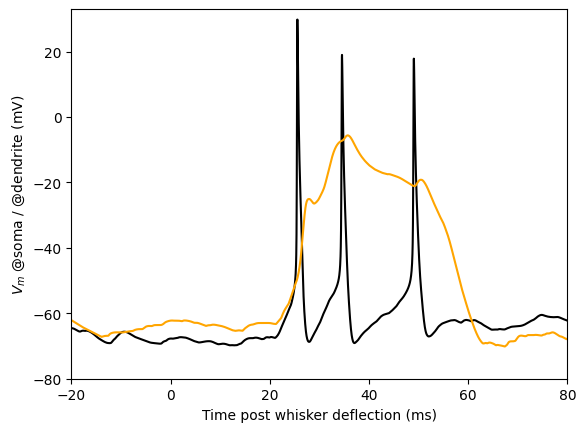

In [24]:
%matplotlib inline
t = I.np.array(cell.tVec)
v_soma = I.np.array(cell.soma.recVList[0])
v_dendrite = rsm.recordingSites[0].vRecordings[0]
I.plt.plot(t-445,v_soma, c = 'k')
I.plt.plot(t-445,v_dendrite, c = 'orange')
I.plt.xlim(-20, 80)
I.plt.ylim(-80, 33)
I.plt.xlabel('Time post whisker deflection (ms)')
I.plt.ylabel('$V_m$ @soma / @dendrite (mV)')
I.plt.show()

In [25]:
I.sca.simple_spike_detection(t, v_soma)

[np.float64(470.499999999709),
 np.float64(479.49999999970083),
 np.float64(493.97499999968767)]

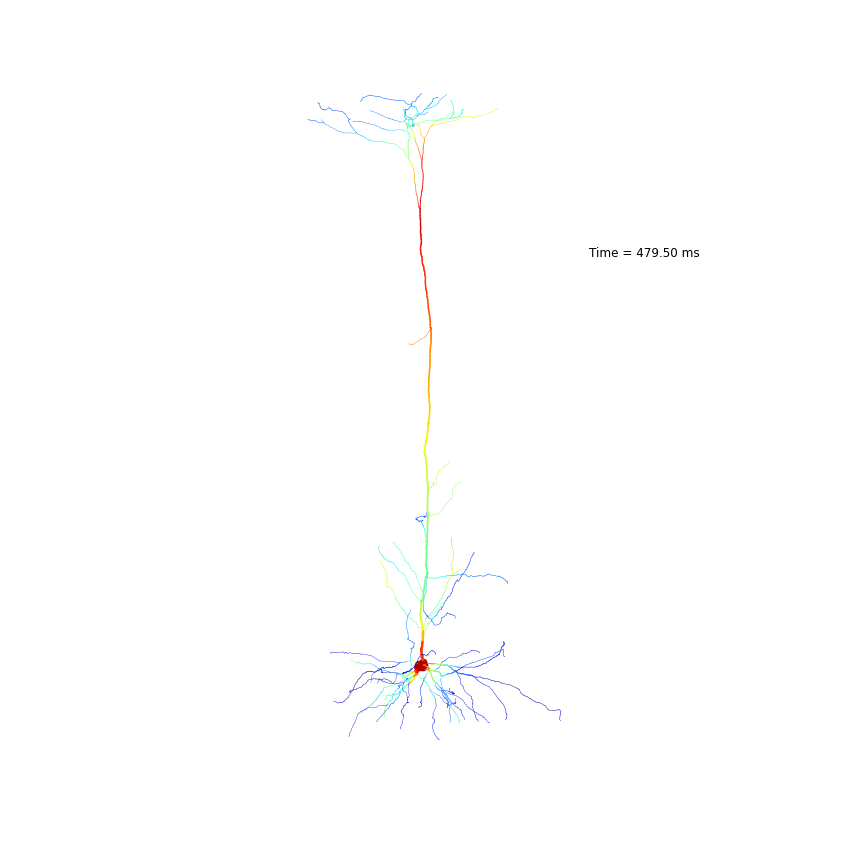

In [26]:
# visualize at timepoint of second somatic AP
from visualize.cell_morphology_visualizer import CellMorphologyVisualizer
cmv = CellMorphologyVisualizer(cell, t_step = 0.5)
cmv.camera_position = {'azim': 270, 'dist': 10, 'elev': -5, 'roll': 0}
cmv.plot(color = 'vm', time_point = 479.5)
I.plt.show()

### Manipulations

In [34]:
def remove_CELLTYPE_in_interval(sa, CELLTYPE=None, tmin=None, tmax=None):
    sa = sa.copy()
    celltype = sa.synapse_type.str.split('_').str[0]

    # Identify rows we want to modify
    mask = celltype == CELLTYPE

    # Only cast numeric (int/float) columns to float to safely assign NaN
    numeric_cols = sa.select_dtypes(include=["int", "float"]).columns
    sa.loc[mask, numeric_cols] = sa.loc[mask, numeric_cols].astype(float)

    # Define masking function
    def fun(x):
        return I.pd.Series({
            name: I.np.nan if (
                I.utils.convertible_to_int(name) and (tmin <= value <= tmax)
            ) else value
            for name, value in x.items()
        }).dropna()

    sa.loc[mask] = sa.loc[mask].apply(fun, axis=1)

    return sa

### no IC evoked activity

In [35]:
def remove_intracortical_in_interval(sa):
    sa = remove_CELLTYPE_in_interval(sa, 'L2', tmin = 445+19, tmax = 445+900)
    sa = remove_CELLTYPE_in_interval(sa, 'L34', tmin = 445+19, tmax = 445+900)
    sa = remove_CELLTYPE_in_interval(sa, 'L4py', tmin = 445+19, tmax = 445+900)
    sa = remove_CELLTYPE_in_interval(sa, 'L4sp', tmin = 445+19, tmax = 445+900)
    sa = remove_CELLTYPE_in_interval(sa, 'L4ss', tmin = 445+19, tmax = 445+900)
    sa = remove_CELLTYPE_in_interval(sa, 'L5st', tmin = 445+19, tmax = 445+900)
    sa = remove_CELLTYPE_in_interval(sa, 'L5tt', tmin = 445+19, tmax = 445+900)
    sa = remove_CELLTYPE_in_interval(sa, 'L6cc', tmin = 445+19, tmax = 445+900)
    sa = remove_CELLTYPE_in_interval(sa, 'L6ccinv', tmin = 445+19, tmax = 445+900)
    sa = remove_CELLTYPE_in_interval(sa, 'L6ct', tmin = 445+19, tmax = 445+900)
    return sa

In [36]:
# remove sensory-evoked IC input, leaving only direct TC
synapse_activation_wo_IC = remove_intracortical_in_interval(synapse_activation)

In [37]:
# resimulate w/o sensory-evoked IC input
cell = I.simrun_trial_to_cell_object(cellName = neuron_parameters,
                                     networkName = network_parameters,
                                     tStop = 445+80, #445ms prestimulus activity, 60ms post stimulus activity
                                     synapse_activation_file = synapse_activation_wo_IC)

[WARNING] ISF: Returning parameter object as is (type: <class 'single_cell_parser.parameters.ParameterSet'>)


[WARNING] ISF: Returning parameter object as is (type: <class 'single_cell_parser.parameters.ParameterSet'>)
NEURON mechanisms not found in /.
NEURON mechanisms not found in /.


In [38]:
# extract dendritic voltage traces
rsm = I.sca.RecordingSiteManager(neuron_parameters.sim.recordingSites[0], cell)
rsm.update_recordings()

Text(0, 0.5, '$V_m$ @soma / @dendrite (mV)')

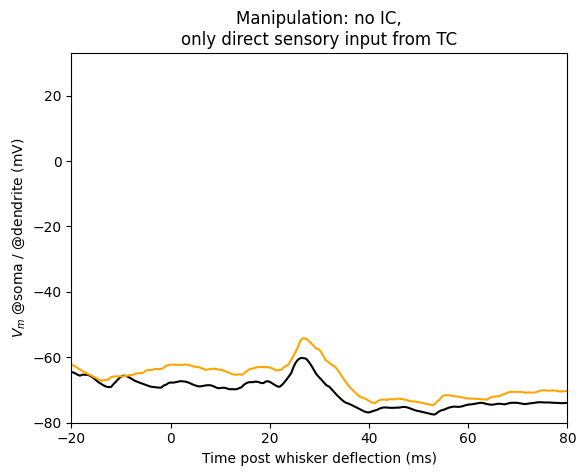

In [39]:
%matplotlib inline
t = I.np.array(cell.tVec)
v_soma = I.np.array(cell.soma.recVList[0])
v_dendrite = rsm.recordingSites[0].vRecordings[0]
I.plt.plot(t-445,v_soma, c = 'k')
I.plt.plot(t-445,v_dendrite, c = 'orange')
I.plt.xlim(-20, 80)
I.plt.ylim(-80, 33)
I.plt.title('Manipulation: no IC,\nonly direct sensory input from TC')
I.plt.xlabel('Time post whisker deflection (ms)')
I.plt.ylabel('$V_m$ @soma / @dendrite (mV)')

### no TC evoked activity

In [40]:
def remove_TC_in_interval(sa):
    return remove_CELLTYPE_in_interval(sa, 'VPM', tmin = 445+19, tmax = 445+900)

In [41]:
# remove sensory-evoked TC input
synapse_activation_wo_TC = remove_TC_in_interval(synapse_activation)

In [42]:
# resimulate w/o sensory-evoked TC input
cell = I.simrun_trial_to_cell_object(cellName = neuron_parameters,
                                     networkName = network_parameters,
                                     tStop = 445+80, #445ms prestimulus activity, 60ms post stimulus activity
                                     synapse_activation_file = synapse_activation_wo_TC)

[WARNING] ISF: Returning parameter object as is (type: <class 'single_cell_parser.parameters.ParameterSet'>)


[WARNING] ISF: Returning parameter object as is (type: <class 'single_cell_parser.parameters.ParameterSet'>)
NEURON mechanisms not found in /.
NEURON mechanisms not found in /.


In [43]:
# extract dendritic voltage traces
rsm = I.sca.RecordingSiteManager(neuron_parameters.sim.recordingSites[0], cell)
rsm.update_recordings()

Text(0, 0.5, '$V_m$ @soma / @dendrite (mV)')

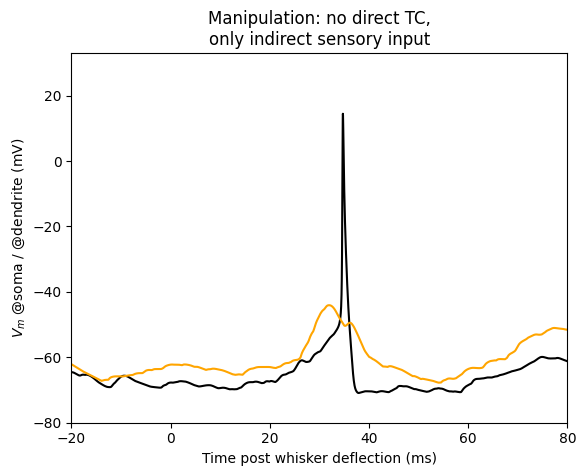

In [44]:
%matplotlib inline
t = I.np.array(cell.tVec)
v_soma = I.np.array(cell.soma.recVList[0])
v_dendrite = rsm.recordingSites[0].vRecordings[0]
I.plt.plot(t-445,v_soma, c = 'k')
I.plt.plot(t-445,v_dendrite, c = 'orange')
I.plt.xlim(-20, 80)
I.plt.ylim(-80, 33)
I.plt.title('Manipulation: no direct TC,\nonly indirect sensory input')
I.plt.xlabel('Time post whisker deflection (ms)')
I.plt.ylabel('$V_m$ @soma / @dendrite (mV)')

### passive apical dendrite

In [50]:
def inactivate_channel(neuron_param, label, channel):
        neuron_param.neuron[label].mechanisms.range[channel]['g'+channel+'bar'] # make sure it is there
        neuron_param.neuron[label].mechanisms.range[channel]['g'+channel+'bar'] = 0.

def create_modified_neuron_param(neuron_param, manipulation = None):
    if manipulation == 'NoActiveDendrite':
        inactivate_channel(neuron_param, 'ApicalDendrite', 'Ca_HVA')
        inactivate_channel(neuron_param, 'ApicalDendrite', 'Ca_LVAst')
        inactivate_channel(neuron_param, 'ApicalDendrite', 'NaTa_t')
        inactivate_channel(neuron_param, 'ApicalDendrite', 'SK_E2')
        inactivate_channel(neuron_param, 'ApicalDendrite', 'Im')
        inactivate_channel(neuron_param, 'ApicalDendrite', 'SKv3_1')
        inactivate_channel(neuron_param, 'ApicalDendrite', 'Ih')
    else:
        raise ValueError()
    return neuron_param

def remove_apical_active_conductances(neuron_param):
    return create_modified_neuron_param(neuron_param, 'NoActiveDendrite')

In [46]:
neuron_parameters_passive_apical = remove_apical_active_conductances(neuron_parameters)

In [47]:
# resimulate with passive apical dendrite
cell = I.simrun_trial_to_cell_object(cellName = neuron_parameters_passive_apical,
                                     networkName = network_parameters,
                                     tStop = 445+80, #445ms prestimulus activity, 60ms post stimulus activity
                                     synapse_activation_file = synapse_activation)

[WARNING] ISF: Returning parameter object as is (type: <class 'single_cell_parser.parameters.ParameterSet'>)


[WARNING] ISF: Returning parameter object as is (type: <class 'single_cell_parser.parameters.ParameterSet'>)
NEURON mechanisms not found in /.
NEURON mechanisms not found in /.


In [48]:
# extract dendritic voltage traces
rsm = I.sca.RecordingSiteManager(neuron_parameters.sim.recordingSites[0], cell)
rsm.update_recordings()

Text(0, 0.5, '$V_m$ @soma / @dendrite (mV)')

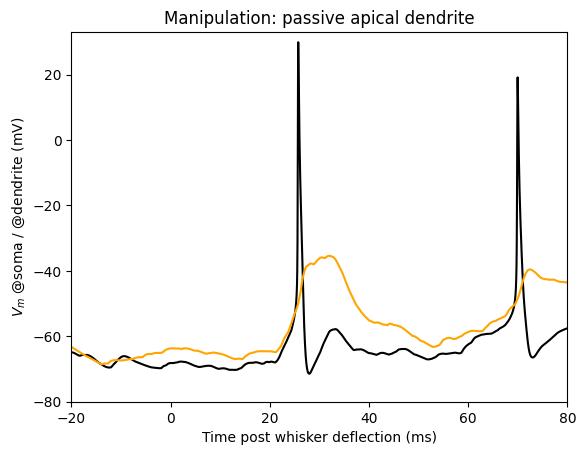

In [49]:
%matplotlib inline
t = I.np.array(cell.tVec)
v_soma = I.np.array(cell.soma.recVList[0])
v_dendrite = rsm.recordingSites[0].vRecordings[0]
I.plt.plot(t-445,v_soma, c = 'k')
I.plt.plot(t-445,v_dendrite, c = 'orange')
I.plt.xlim(-20, 80)
I.plt.ylim(-80, 33)
I.plt.title('Manipulation: passive apical dendrite')
I.plt.xlabel('Time post whisker deflection (ms)')
I.plt.ylabel('$V_m$ @soma / @dendrite (mV)')